# Desempleo en Estados Unidos

[Estadísticas de Desempleo por área iniciando en 1976](https://catalog.data.gov/dataset/local-area-unemployment-statistics-beginning-1976)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('4 - Local_Area_Unemployment_Statistics__Beginning_1976.csv')
df.shape

(78575, 7)

In [4]:
df.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,New York State,2019,1,9571700,9132700,439000,4.6
1,New York State,2019,2,9556600,9137800,418900,4.4
2,New York State,2019,3,9591300,9197900,393400,4.1
3,New York State,2019,4,9542500,9203200,339300,3.6
4,New York State,2019,5,9541700,9181100,360700,3.8


Como vemos, en el DataFrame tenemos el Año (*Year*) y el Mes (*Month*) separados. Para graficar, lo ideal es que tuvieramos una columna con la fecha, utilizaremos el formato americano: YYYY-MM-DD y utilizaremos el día 01 para todos los casos

In [5]:
df['fecha'] = df.apply(lambda x: "{}-{}-01".format(x.Year, x.Month), axis=1)

In [6]:
df.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,fecha
0,New York State,2019,1,9571700,9132700,439000,4.6,2019-1-01
1,New York State,2019,2,9556600,9137800,418900,4.4,2019-2-01
2,New York State,2019,3,9591300,9197900,393400,4.1,2019-3-01
3,New York State,2019,4,9542500,9203200,339300,3.6,2019-4-01
4,New York State,2019,5,9541700,9181100,360700,3.8,2019-5-01


Todo parece bien, pero veamos que tipo de dato está guardado en la fecha, aplicando `dtypes` sobre un DataFrame, nos indica que tipo de dato es cada columna

In [7]:
df.dtypes

Area                                                                                                                                                                                        object
Year                                                                                                                                                                                         int64
Month                                                                                                                                                                                        int64
Labor Force                                                                                                                                                                                  int64
Employed                                                                                                                                                                                     int64
Unemployed               

Podemos ver de qué tipos son las columnas individuales si las especificamos:

In [ ]:
df[['fecha']].dtypes

Como se puede ver, "fecha" es de un tipo de dato "object", que significa que es un string. Podemos hacer dos cosas:

1) Corregir lo que hicimos pidiéndole a Pandas que convierta esa columna en un `datetime`

In [ ]:
pd.to_datetime(df.fecha)[:3]

In [ ]:
df['fecha'] = pd.to_datetime(df.fecha)

In [ ]:
df[['fecha']].dtypes

o...

2) Haberlo hecho de la forma correcta desde un principio, aplicando la función `Timestamp` desde la conversión

Pero antes de hacer esto, vamos a eliminar la columna de `fecha`

In [ ]:
df.drop('fecha', axis=1, inplace=True)
df.head()

In [9]:
df['fecha'] = df.apply(lambda x: pd.Timestamp("{}-{}-01".format(x.Year, x.Month)), axis=1)

In [8]:
df.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,fecha
0,New York State,2019,1,9571700,9132700,439000,4.6,2019-1-01
1,New York State,2019,2,9556600,9137800,418900,4.4,2019-2-01
2,New York State,2019,3,9591300,9197900,393400,4.1,2019-3-01
3,New York State,2019,4,9542500,9203200,339300,3.6,2019-4-01
4,New York State,2019,5,9541700,9181100,360700,3.8,2019-5-01


In [ ]:
df[['fecha']].dtypes

Ahora que tenemos la columna fecha de forma correcta, podemos hacer nuestra primera gráfica, como hay muchísimos datos, escojamos una sola area del DataFrame

In [10]:
df.Area.value_counts()[:10]

New York City                    887
New York State                   528
BALANCE OF STATE                 528
New York City Region             527
Perinton Town                    359
Lancaster Town                   359
Putnam-Balance Of Westchester    359
Auburn City                      359
Union Town                       359
Guilderland Town                 359
Name: Area, dtype: int64

Podemos ver que **New York City** es quien más datos tiene, por lo que usaremos ese área como base

In [13]:
nyc = df[df.Area == 'New York City']
nyc.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,fecha
32647,New York City,2019,1,4104300,3904300,200000,4.9,2019-01-01
32648,New York City,2019,2,4123200,3935100,188100,4.6,2019-02-01
32649,New York City,2019,3,4127600,3954100,173600,4.2,2019-03-01
32650,New York City,2019,4,4092700,3941100,151600,3.7,2019-04-01
32651,New York City,2019,5,4082800,3911700,171100,4.2,2019-05-01


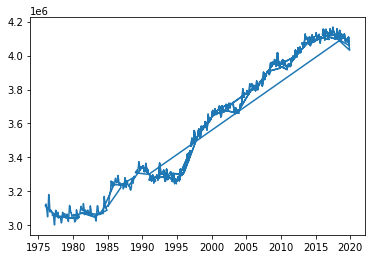

In [14]:
plt.plot(nyc.fecha, nyc['Labor Force'])

El problema con las lineas extrañas que pinta, es que los datos no están ordenados por fecha, por lo que está pintando las líneas en el orden como viene en el archivo, por lo que primero debemos ordenar el archivo por fecha

In [15]:
nyc = nyc.sort_values(by='fecha')
nyc.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,fecha
41683,New York City,1976,1,3114200,2757200,357000,11.5,1976-01-01
41684,New York City,1976,2,3125100,2762400,362700,11.6,1976-02-01
41685,New York City,1976,3,3104400,2771000,333300,10.7,1976-03-01
41686,New York City,1976,4,3082800,2764700,318100,10.3,1976-04-01
41687,New York City,1976,5,3050300,2748500,301800,9.9,1976-05-01


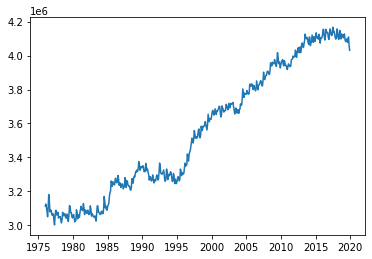

In [16]:
plt.plot(nyc.fecha, nyc['Labor Force'])

Si añadimos "plots", estos se hacen de forma aditiva, y matplotlib les asinga un color nuevo de forma automática

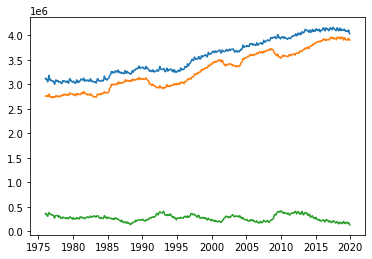

In [17]:
plt.plot(nyc.fecha, nyc['Labor Force'])
plt.plot(nyc.fecha, nyc['Employed'])
plt.plot(nyc.fecha, nyc['Unemployed'])

Text(0.5, 1.0, 'Progresión del empleo en NYC')

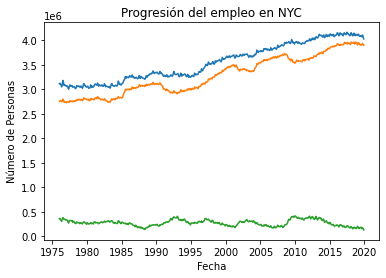

In [18]:
plt.plot(nyc.fecha, nyc['Labor Force'])
plt.plot(nyc.fecha, nyc['Employed'])
plt.plot(nyc.fecha, nyc['Unemployed'])

plt.xlabel('Fecha')
plt.ylabel('Número de Personas')
plt.title('Progresión del empleo en NYC')

Podemos añadir etiquetas para aclarar qué significa cada color

Text(0.5, 1.0, 'Progresión del empleo en NYC')

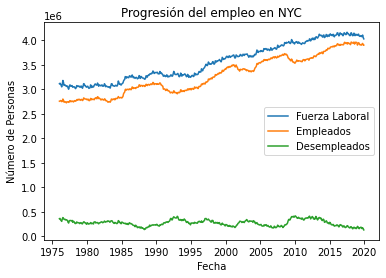

In [19]:
plt.plot(nyc.fecha, nyc['Labor Force'], label="Fuerza Laboral")
plt.plot(nyc.fecha, nyc['Employed'],    label="Empleados")
plt.plot(nyc.fecha, nyc['Unemployed'],  label="Desempleados")
plt.legend(loc='best')

plt.xlabel('Fecha')
plt.ylabel('Número de Personas')
plt.title('Progresión del empleo en NYC')

## Gráficas para comparar dos áreas diferentes

Practicaremos como hacer gráficas para tres regiones, nyc, que ya la tenemos, pero tambien **New York State** y **Buffalo City**

Como recordamos, los datos venían desordenados, por lo que es mejor que antes de "cortar" las regiones, ordenemos todos los datos

In [20]:
df = df.sort_values(by="fecha")
df.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,fecha
516,New York State,1976,1,7634700,6780200,854400,11.2,1976-01-01
25455,New York City Region,1976,1,3114200,2757200,357000,11.5,1976-01-01
41683,New York City,1976,1,3114200,2757200,357000,11.5,1976-01-01
44365,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0,1976-01-01
25456,New York City Region,1976,2,3125100,2762400,362700,11.6,1976-02-01


In [21]:
nys = df[df.Area == "New York State"]
buf = df[df.Area == "Buffalo City"]

Graficamos el porcentaje de desempleo (será necesario calcularlo)

Text(0, 0.5, 'Porcentaje')

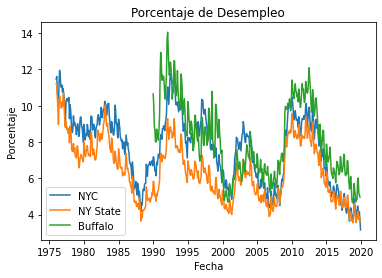

In [27]:
plt.plot(nyc.fecha, nyc['Unemployed']/nyc['Labor Force']*100, label="NYC")
plt.plot(nys.fecha, nys['Unemployed']/nys['Labor Force']*100, label="NY State")
plt.plot(buf.fecha, buf['Unemployed']/buf['Labor Force']*100, label="Buffalo")
plt.legend(loc='best')

plt.title('Porcentaje de Desempleo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')

En un primer análisis, podemos ver que el porcentaje de desempleados es más bajo en el estado que en sus ciudades, pero ¿qué pasa si queremos comparar no los porcentajes, sino los números absolutos y estamos comparando a una ciudad grande como NYC contra una pequeña como Buffalo?

Text(0, 0.5, 'Personas')

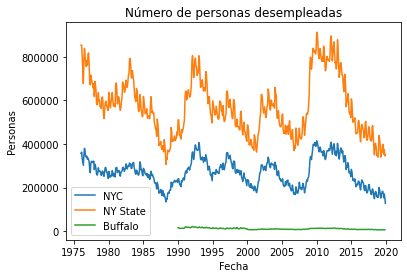

In [26]:
plt.plot(nyc.fecha, nyc['Unemployed'], label="NYC")
plt.plot(nys.fecha, nys['Unemployed'], label="NY State")
plt.plot(buf.fecha, buf['Unemployed'], label="Buffalo")
plt.legend(loc='best')

plt.title('Número de personas desempleadas')
plt.xlabel('Fecha')

plt.ylabel('Personas')

Creamos "subplots" para hacer gráficas para cada ciudad, una al lado de la otra

Text(0, 0.5, 'Personas')

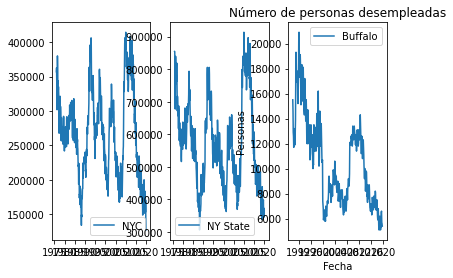

In [25]:
# Subplot de 1 renglón
#            3 columnas
#            1 gráfica
#
plt.subplot(131)
plt.plot(nyc.fecha, nyc['Unemployed'], label="NYC")
plt.legend(loc='best')

# Subplot de 1 renglón
#            3 columnas
#            2 gráfica
#
plt.subplot(132)
plt.plot(nys.fecha, nys['Unemployed'], label="NY State")
plt.legend(loc='best')

# Subplot de 1 renglón
#            3 columnas
#            3 gráfica
#
plt.subplot(133)
plt.plot(buf.fecha, buf['Unemployed'], label="Buffalo")
plt.legend(loc='best')

plt.title('Número de personas desempleadas')
plt.xlabel('Fecha')
plt.ylabel('Personas')

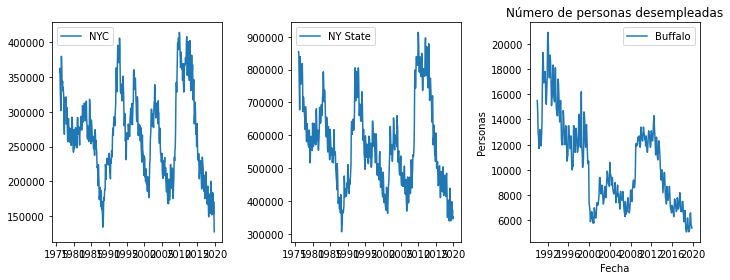

In [22]:
# Cambiamos el tamaño de la figura. Es importante hacerlo antes que otra cosa
plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(nyc.fecha, nyc['Unemployed'], label="NYC")
plt.legend(loc='best')

plt.subplot(132)
plt.plot(nys.fecha, nys['Unemployed'], label="NY State")
plt.legend(loc='best')

plt.subplot(133)
plt.plot(buf.fecha, buf['Unemployed'], label="Buffalo")
plt.legend(loc='best')

plt.title('Número de personas desempleadas')
plt.xlabel('Fecha')
plt.ylabel('Personas')

# Ajusta el tamaño de las gráficas de acuerdo con el espacio existente
plt.tight_layout()
# plt.tight_layout(pad=5)


Otra forma de poner gráficas dentro de una gráfica es usar `subplot2grid`

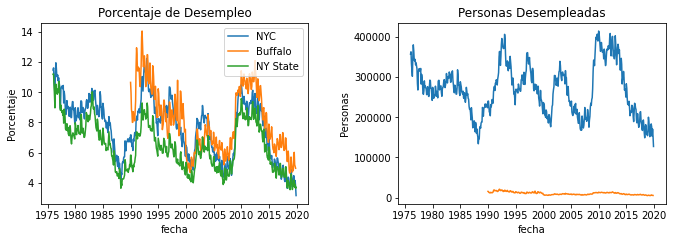

In [28]:
plt.figure(figsize=(10,4))

plt.subplot2grid((1, 2), (0, 0))
plt.plot(nyc.fecha, nyc['Unemployed']/nyc['Labor Force']*100, label='NYC')
plt.plot(buf.fecha, buf['Unemployed']/buf['Labor Force']*100, label="Buffalo")
plt.plot(nys.fecha, nys['Unemployed']/nys['Labor Force']*100, label="NY State")
plt.legend(loc='best')
plt.xlabel('fecha')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Desempleo')

plt.subplot2grid((1, 2), (0, 1))
plt.plot(nyc.fecha, nyc['Unemployed'], label="NYC")
plt.plot(buf.fecha, buf['Unemployed'], label="BUF")
plt.xlabel('fecha')
plt.ylabel('Personas')
plt.title('Personas Desempleadas')

plt.tight_layout(pad=3)

Supongamos que queremos añadir la información del número de personas desempleadas en el estado, en un grid donde el primer renglón tiene la información estatal, y el segundo renglón las comparativas de cada ciudad

El formato que buscamos es el siguiente:

    +------------------------------------------------------------------------+
    |                                                                        |
    |               Personas desempleadas en el estado                       |
    |                                                                        |
    +---------------------------------+--------------------------------------+
    |                                 |                                      |
    |      % de desempleo             |      Número (bruto) de personas sin  |
    |                                 |               empleo                 |
    |                                 |                                      |
    +---------------------------------+--------------------------------------+
    

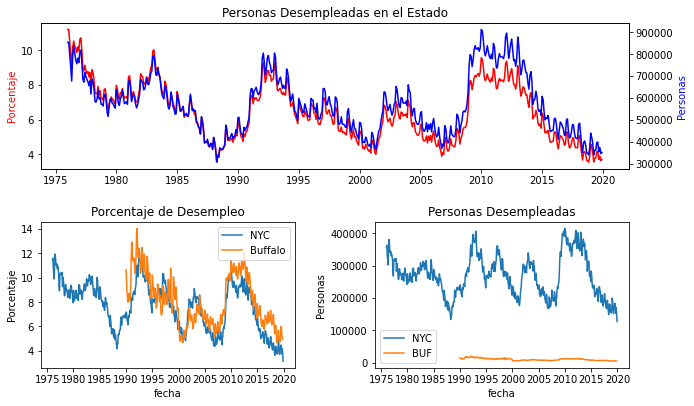

In [29]:
plt.figure(figsize=(10,6))

plt.subplot2grid((2, 2), (0, 0), colspan=2)
plt.plot(nys.fecha, nys['Unemployed']/nys['Labor Force']*100, c='red')
plt.ylabel('Porcentaje', color='red')
plt.twinx()
plt.plot(nys.fecha, nys['Unemployed'], c='blue')
plt.xlabel('fecha')
plt.ylabel('Personas', color='blue')
plt.title('Personas Desempleadas en el Estado')

plt.subplot2grid((2, 2), (1, 0))
plt.plot(nyc.fecha, nyc['Unemployed']/nyc['Labor Force']*100, label='NYC')
plt.plot(buf.fecha, buf['Unemployed']/buf['Labor Force']*100, label="Buffalo")
plt.legend(loc='best')
plt.xlabel('fecha')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Desempleo')

plt.subplot2grid((2, 2), (1, 1))
plt.plot(nyc.fecha, nyc['Unemployed'], label="NYC")
plt.plot(buf.fecha, buf['Unemployed'], label="BUF")
plt.legend(loc='best')
plt.xlabel('fecha')
plt.ylabel('Personas')
plt.title('Personas Desempleadas')

plt.tight_layout(pad=2)

En la primera gráfica no podemos ver con claridad el porcentaje de personas desempleadas porque su número es muy pequeño comparado contra el número de las personas desempleadas, por lo que podemos crear un segundo eje para visualizarlo mejor